In [10]:
from MagicCube import MagicCube
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def genetic_algorithm(initial_cube, population_size, max_generations, tournament_size=2):
    def initialize_population(size):
        return [MagicCube(5) for _ in range(size)]

    def fitness(cube):
        return 1 / (1 + cube.objectiveFunction())

    def tournament_selection(population, size):
        tournament = random.sample(population, size)
        return max(tournament, key=fitness)

    def crossover(parent1, parent2):
        n = parent1.cube.shape[0]
        child = MagicCube(n)
        
        mask = np.random.rand(*parent1.cube.shape) < 0.5
        child.cube[mask] = parent1.cube[mask]
        child.cube[~mask] = parent2.cube[~mask]
        
        return child

    def repair(child):
        unique_numbers = set(child.cube.flatten())
        all_numbers = set(range(1, child.n**3 + 1))
        missing_numbers = list(all_numbers - unique_numbers)
        for i in range(child.n):
            for j in range(child.n):
                for k in range(child.n):
                    if list(child.cube.flatten()).count(child.cube[i, j, k]) > 1:
                        if missing_numbers:
                            child.cube[i, j, k] = missing_numbers.pop(0)

    def mutate(cube):
        num_mutations = random.randint(1, cube.n**3 // 10)
        for _ in range(num_mutations):
            pos1 = (random.randint(0, cube.n-1), random.randint(0, cube.n-1), random.randint(0, cube.n-1))
            pos2 = (random.randint(0, cube.n-1), random.randint(0, cube.n-1), random.randint(0, cube.n-1))
            cube.swapElements(pos1, pos2)

    population = initialize_population(population_size)
    best_fitness_history = []
    avg_fitness_history = []
    start_time = time.time()

    for generation in range(max_generations):
        new_population = []

        num_elites = 2  # atau 1 untuk hanya 1 individu elit
        elites = sorted(population, key=fitness, reverse=True)[:num_elites]
        new_population.extend(elites)

        while len(new_population) < population_size:
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child = crossover(parent1, parent2)
            repair(child)
            mutate(child)
            new_population.append(child)

        population = new_population

        fitnesses = [fitness(cube) for cube in population]
        best_fitness = max(fitnesses)
        avg_fitness = sum(fitnesses) / len(fitnesses)

        # Ambil nilai objective terbaik dari individu elit pertama
        best_obj_value = elites[0].objectiveFunction()
        avg_obj_value = sum(cube.objectiveFunction() for cube in population) / len(population)

        best_fitness_history.append(best_obj_value)
        avg_fitness_history.append(avg_obj_value)

        print(f"Generation {generation}: Best f(x) = {best_obj_value}, Avg f(x) = {avg_obj_value}")

        if best_obj_value == 0:
            break

    duration = time.time() - start_time
    best_solution = max(population, key=fitness)
    return best_solution, best_fitness_history, avg_fitness_history, generation + 1, duration


In [12]:
def visualize_experiment(initial_cube, final_cube, best_history, avg_history):
    print("Initial State:")
    initial_cube.visualize()

    print("Final State:")
    final_cube.visualize()

    plt.figure(figsize=(10, 6))
    plt.plot(best_history, label='Best f(x)')
    plt.plot(avg_history, label='Average f(x)')
    plt.title('Objective Function terhadap Banyak Generasi')
    plt.xlabel('Generasi')
    plt.ylabel('Objective Function (f(x))')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
if __name__ == "__main__":
    population_sizes = [100]
    max_generations_list = [200]

    for pop_size in population_sizes:
        for max_gen in max_generations_list:
            print(f"\nEksperimen: Ukuran Populasi = {pop_size}, Maksimum Generasi = {max_gen}")
            
            for run in range(3):  # Jalankan 3 kali untuk setiap konfigurasi
                initial_cube = MagicCube(n=5)
                
                final_cube, best_history, avg_history, generations, duration = genetic_algorithm(initial_cube, pop_size, max_gen)

                print(f"Run {run + 1}:")
                print(f"Total Generasi: {generations}")
                print(f"Durasi: {duration:.2f} detik")
                print(f"Final Objective Function: {final_cube.objectiveFunction()}")
                
                visualize_experiment(initial_cube, final_cube, best_history, avg_history)


Eksperimen: Ukuran Populasi = 100, Maksimum Generasi = 200
Generation 0: Best f(x) = 4729, Avg f(x) = 6071.78
Generation 1: Best f(x) = 4729, Avg f(x) = 6496.46
Generation 2: Best f(x) = 4729, Avg f(x) = 6879.12
Generation 3: Best f(x) = 4729, Avg f(x) = 7042.72
Generation 4: Best f(x) = 4729, Avg f(x) = 7119.61
Generation 5: Best f(x) = 4729, Avg f(x) = 7332.5
Generation 6: Best f(x) = 4729, Avg f(x) = 7406.51
Generation 7: Best f(x) = 4729, Avg f(x) = 7454.25
Generation 8: Best f(x) = 4729, Avg f(x) = 7475.89
Generation 9: Best f(x) = 4729, Avg f(x) = 7438.98
Generation 10: Best f(x) = 4729, Avg f(x) = 7459.37
Generation 11: Best f(x) = 4729, Avg f(x) = 7367.86
Generation 12: Best f(x) = 4729, Avg f(x) = 7410.26
Generation 13: Best f(x) = 4729, Avg f(x) = 7444.66
Generation 14: Best f(x) = 4729, Avg f(x) = 7399.7
Generation 15: Best f(x) = 4729, Avg f(x) = 7339.69
Generation 16: Best f(x) = 4729, Avg f(x) = 7251.5
Generation 17: Best f(x) = 4729, Avg f(x) = 7220.36
Generation 18: Be


Eksperimen: Ukuran Populasi = 50, Maksimum Generasi = 10
Generation 0: Best f(x) = 4733, Avg f(x) = 5989.84
Generation 1: Best f(x) = 4733, Avg f(x) = 6406.86
Generation 2: Best f(x) = 4733, Avg f(x) = 6703.54
Generation 3: Best f(x) = 4733, Avg f(x) = 6874.16
Generation 4: Best f(x) = 4733, Avg f(x) = 6851.48
Generation 5: Best f(x) = 4733, Avg f(x) = 6814.56
Generation 6: Best f(x) = 4733, Avg f(x) = 6766.34
Generation 7: Best f(x) = 4733, Avg f(x) = 6725.04
Generation 8: Best f(x) = 4733, Avg f(x) = 6493.36
Generation 9: Best f(x) = 4733, Avg f(x) = 6419.14
Run 1:
Total Generasi: 10
Durasi: 2.36 detik
Final Objective Function: 4733
Initial State:


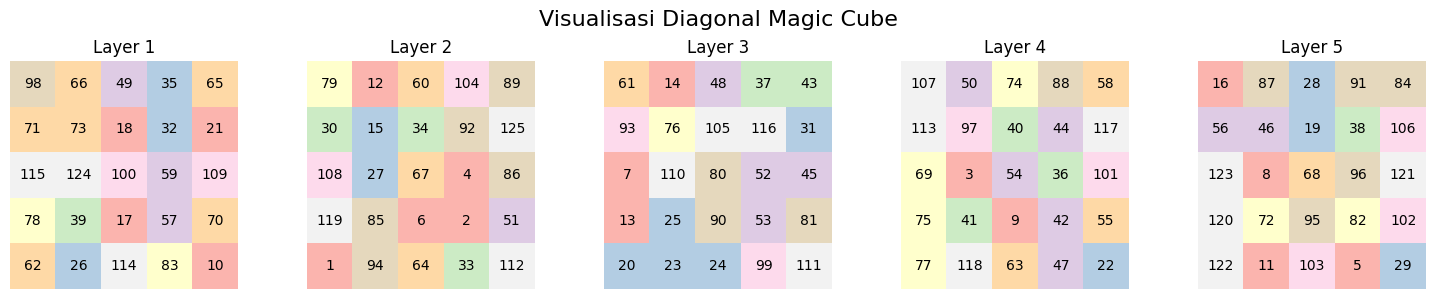

Final State:


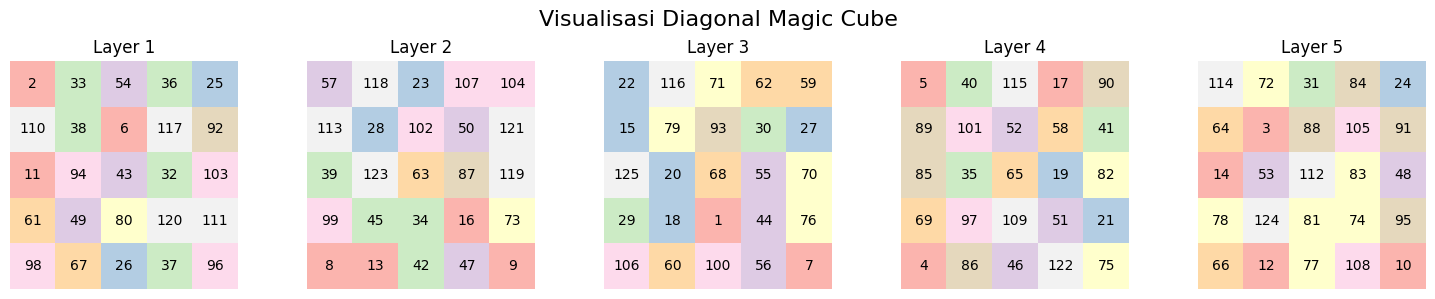

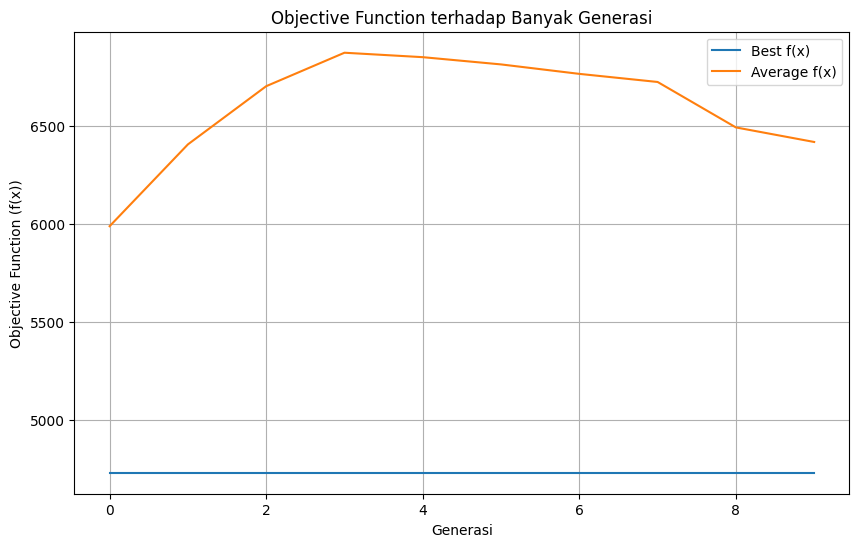

Generation 0: Best f(x) = 4389, Avg f(x) = 5905.14
Generation 1: Best f(x) = 4389, Avg f(x) = 6403.72
Generation 2: Best f(x) = 4389, Avg f(x) = 6573.1
Generation 3: Best f(x) = 4389, Avg f(x) = 6725.86
Generation 4: Best f(x) = 4389, Avg f(x) = 6614.88
Generation 5: Best f(x) = 4389, Avg f(x) = 6397.34
Generation 6: Best f(x) = 4389, Avg f(x) = 6356.16
Generation 7: Best f(x) = 4389, Avg f(x) = 5991.52
Generation 8: Best f(x) = 4389, Avg f(x) = 5687.64
Generation 9: Best f(x) = 4389, Avg f(x) = 5369.34
Run 2:
Total Generasi: 10
Durasi: 2.38 detik
Final Objective Function: 4389
Initial State:


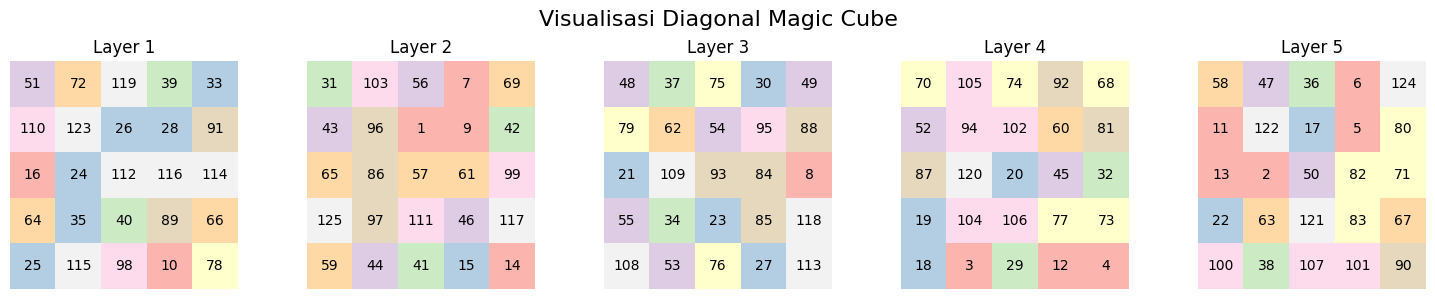

Final State:


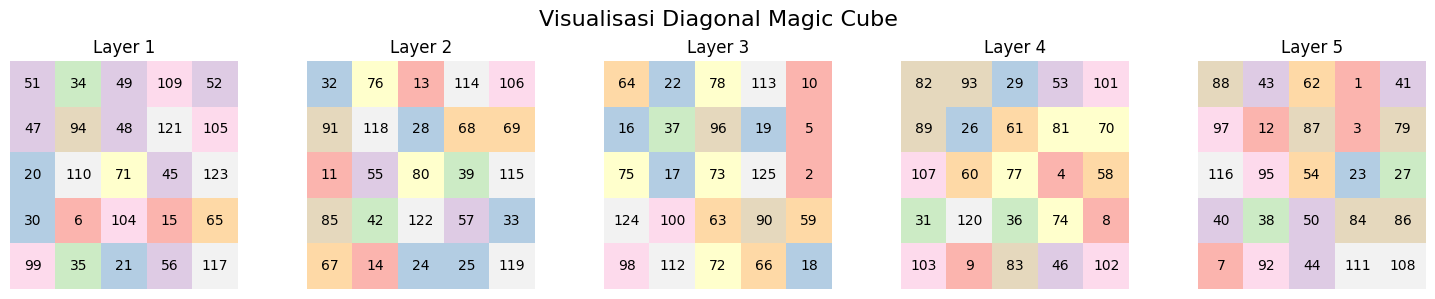

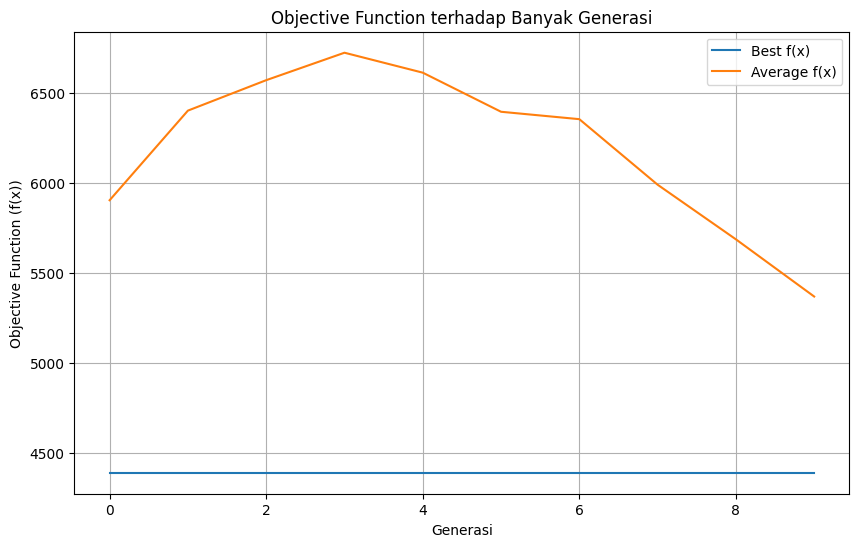

Generation 0: Best f(x) = 4929, Avg f(x) = 5973.82
Generation 1: Best f(x) = 4923, Avg f(x) = 6380.42
Generation 2: Best f(x) = 4923, Avg f(x) = 6610.48
Generation 3: Best f(x) = 4923, Avg f(x) = 6543.94
Generation 4: Best f(x) = 4767, Avg f(x) = 6388.58
Generation 5: Best f(x) = 4767, Avg f(x) = 6185.34
Generation 6: Best f(x) = 4461, Avg f(x) = 5923.94
Generation 7: Best f(x) = 4461, Avg f(x) = 5737.94
Generation 8: Best f(x) = 4461, Avg f(x) = 5592.86
Generation 9: Best f(x) = 4461, Avg f(x) = 5245.94
Run 3:
Total Generasi: 10
Durasi: 2.32 detik
Final Objective Function: 4364
Initial State:


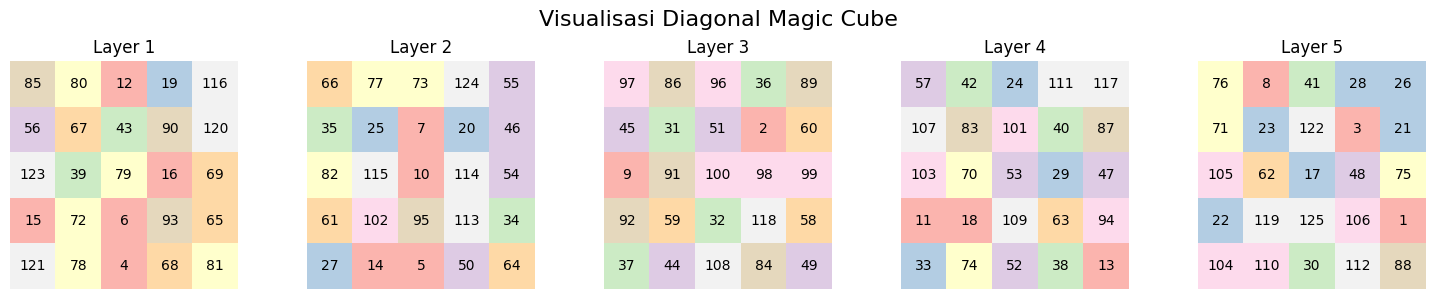

Final State:


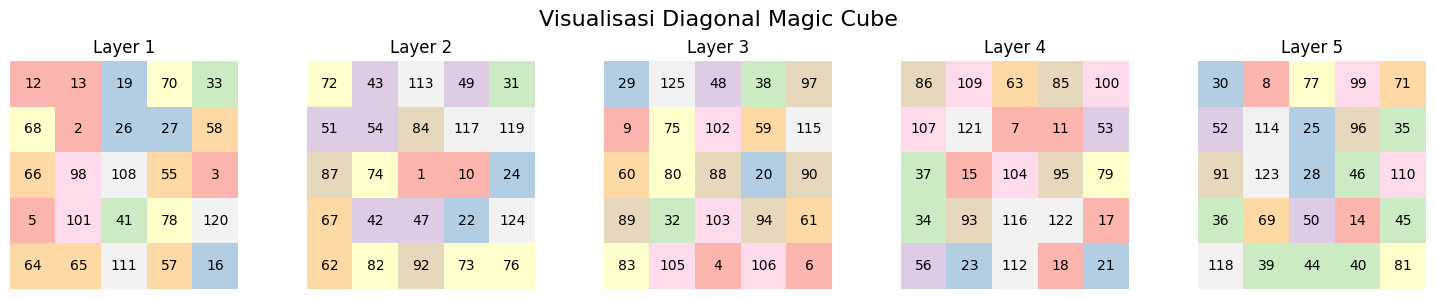

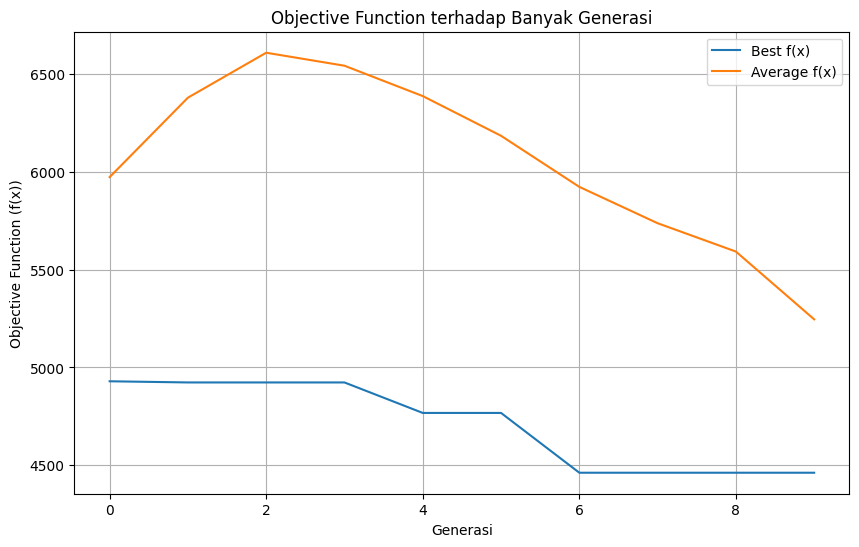


Eksperimen: Ukuran Populasi = 50, Maksimum Generasi = 30
Generation 0: Best f(x) = 4533, Avg f(x) = 6046.06
Generation 1: Best f(x) = 4533, Avg f(x) = 6411.38
Generation 2: Best f(x) = 4533, Avg f(x) = 6800.54
Generation 3: Best f(x) = 4533, Avg f(x) = 6703.6
Generation 4: Best f(x) = 4459, Avg f(x) = 6677.0
Generation 5: Best f(x) = 4459, Avg f(x) = 6598.5
Generation 6: Best f(x) = 4459, Avg f(x) = 6302.8
Generation 7: Best f(x) = 4459, Avg f(x) = 6103.34
Generation 8: Best f(x) = 4459, Avg f(x) = 6052.88
Generation 9: Best f(x) = 4459, Avg f(x) = 5857.02
Generation 10: Best f(x) = 4459, Avg f(x) = 5712.7
Generation 11: Best f(x) = 4459, Avg f(x) = 5671.52
Generation 12: Best f(x) = 4055, Avg f(x) = 5382.36
Generation 13: Best f(x) = 4055, Avg f(x) = 5253.98
Generation 14: Best f(x) = 4055, Avg f(x) = 5001.08
Generation 15: Best f(x) = 4050, Avg f(x) = 4723.0
Generation 16: Best f(x) = 3884, Avg f(x) = 4620.4
Generation 17: Best f(x) = 3884, Avg f(x) = 4531.46
Generation 18: Best f(x

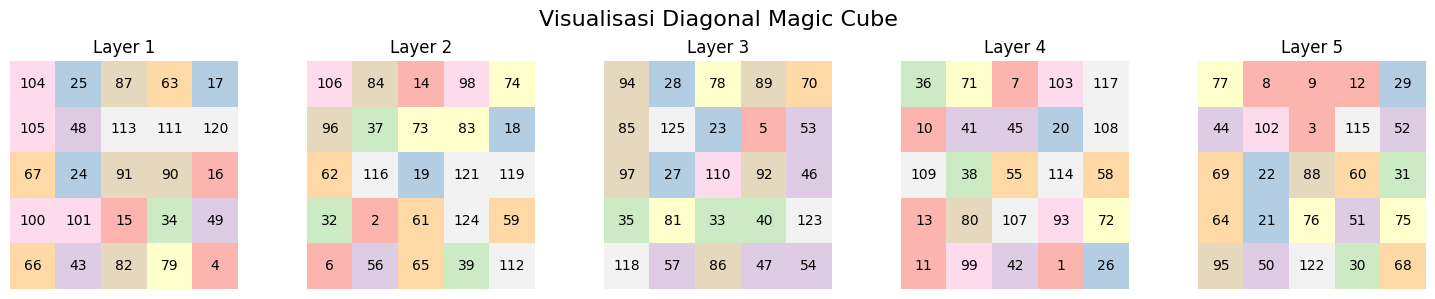

Final State:


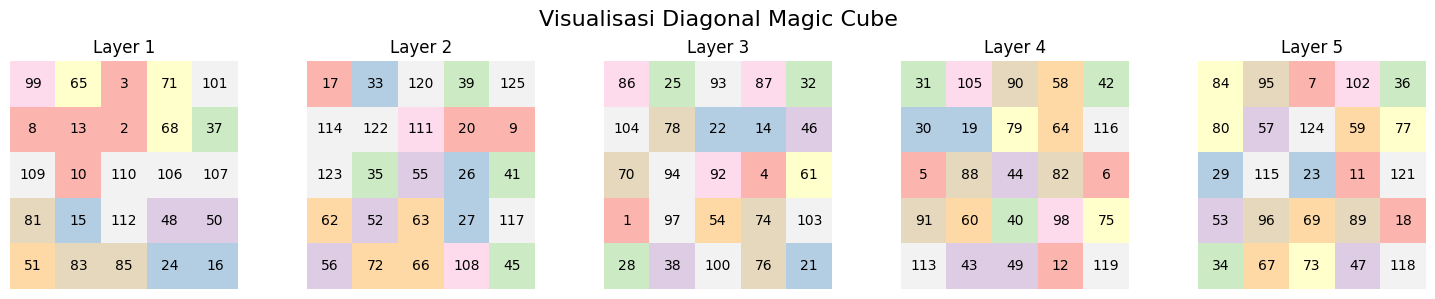

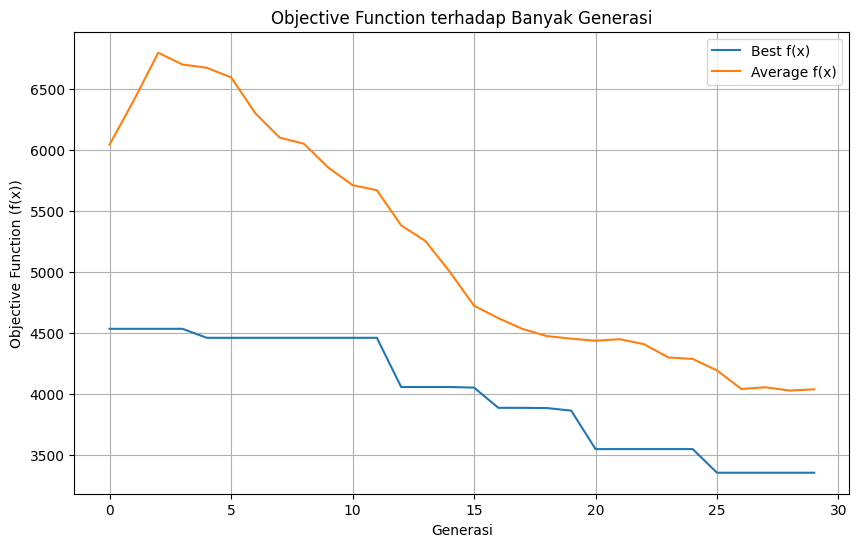

Generation 0: Best f(x) = 4728, Avg f(x) = 5866.74
Generation 1: Best f(x) = 4728, Avg f(x) = 6440.5
Generation 2: Best f(x) = 4728, Avg f(x) = 6702.98
Generation 3: Best f(x) = 4728, Avg f(x) = 6857.0
Generation 4: Best f(x) = 4728, Avg f(x) = 6648.88
Generation 5: Best f(x) = 4613, Avg f(x) = 6458.68
Generation 6: Best f(x) = 4613, Avg f(x) = 6134.66
Generation 7: Best f(x) = 4613, Avg f(x) = 5973.74
Generation 8: Best f(x) = 4613, Avg f(x) = 5891.08
Generation 9: Best f(x) = 4472, Avg f(x) = 5556.26
Generation 10: Best f(x) = 4382, Avg f(x) = 5347.94
Generation 11: Best f(x) = 4344, Avg f(x) = 5159.92
Generation 12: Best f(x) = 4344, Avg f(x) = 5108.8
Generation 13: Best f(x) = 4344, Avg f(x) = 5001.86
Generation 14: Best f(x) = 4151, Avg f(x) = 4998.92
Generation 15: Best f(x) = 4151, Avg f(x) = 4949.72
Generation 16: Best f(x) = 4151, Avg f(x) = 4907.28
Generation 17: Best f(x) = 4151, Avg f(x) = 4858.28
Generation 18: Best f(x) = 4151, Avg f(x) = 4822.52
Generation 19: Best f(x) 

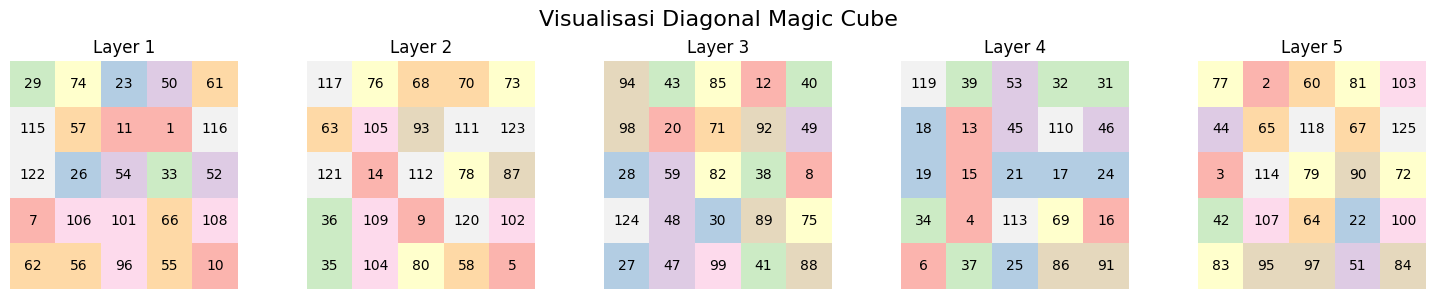

Final State:


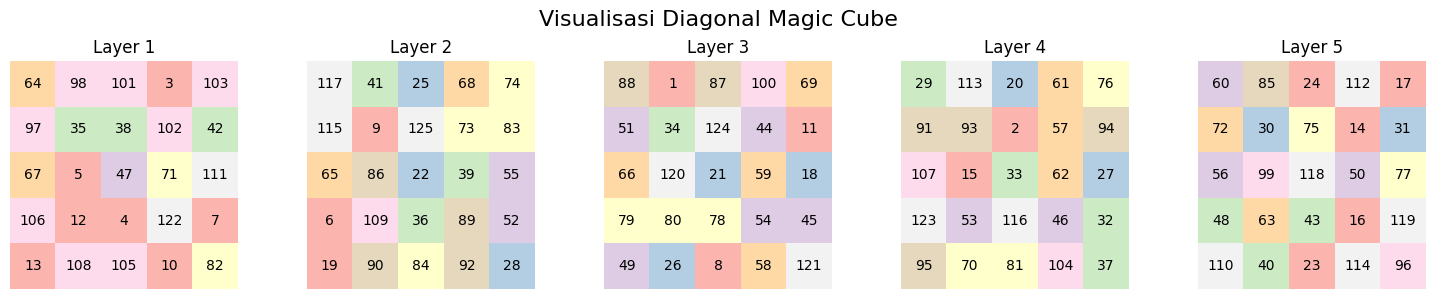

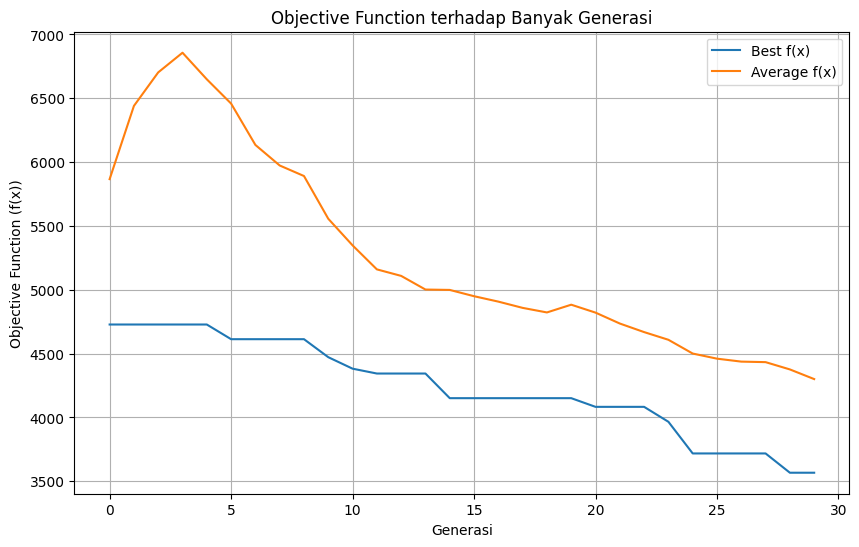

Generation 0: Best f(x) = 4907, Avg f(x) = 6108.32
Generation 1: Best f(x) = 4907, Avg f(x) = 6570.8
Generation 2: Best f(x) = 4907, Avg f(x) = 6786.82
Generation 3: Best f(x) = 4907, Avg f(x) = 6886.94
Generation 4: Best f(x) = 4907, Avg f(x) = 6876.38
Generation 5: Best f(x) = 4907, Avg f(x) = 7097.62
Generation 6: Best f(x) = 4907, Avg f(x) = 6981.64
Generation 7: Best f(x) = 4907, Avg f(x) = 6887.8
Generation 8: Best f(x) = 4907, Avg f(x) = 6829.04
Generation 9: Best f(x) = 4907, Avg f(x) = 6695.42
Generation 10: Best f(x) = 4907, Avg f(x) = 6573.8
Generation 11: Best f(x) = 4907, Avg f(x) = 6485.54
Generation 12: Best f(x) = 4907, Avg f(x) = 6235.64
Generation 13: Best f(x) = 4699, Avg f(x) = 5944.88
Generation 14: Best f(x) = 4621, Avg f(x) = 5567.34
Generation 15: Best f(x) = 4621, Avg f(x) = 5378.94
Generation 16: Best f(x) = 4438, Avg f(x) = 5186.5
Generation 17: Best f(x) = 4438, Avg f(x) = 5109.74
Generation 18: Best f(x) = 4281, Avg f(x) = 5009.38
Generation 19: Best f(x) =

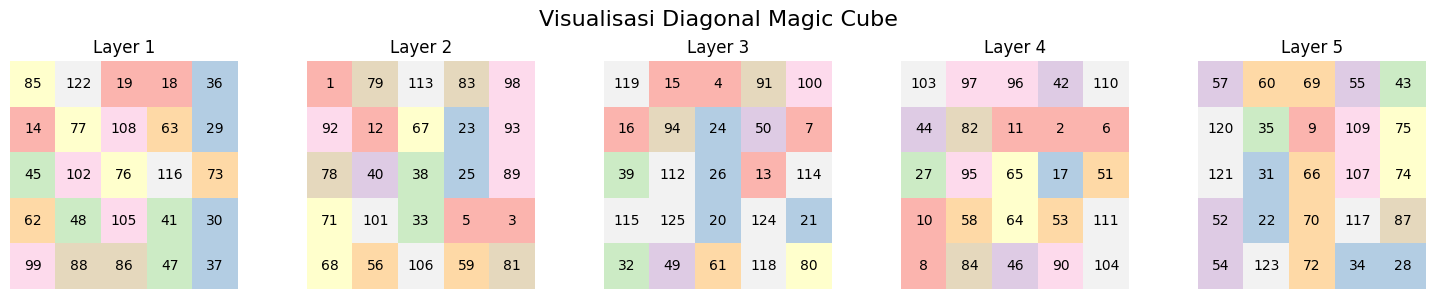

Final State:


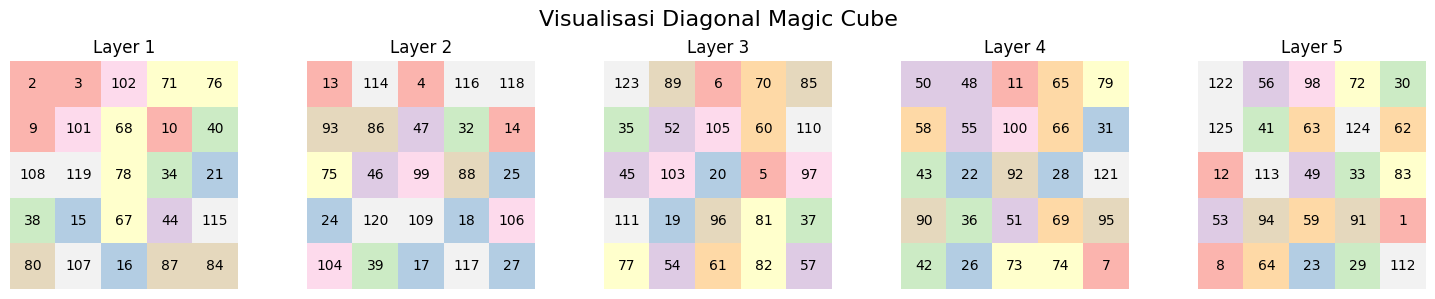

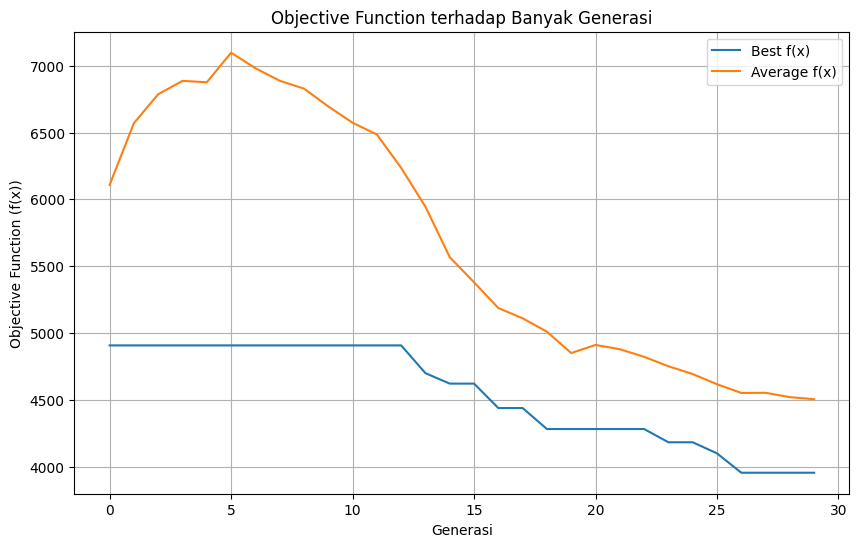


Eksperimen: Ukuran Populasi = 50, Maksimum Generasi = 50
Generation 0: Best f(x) = 4751, Avg f(x) = 6027.42
Generation 1: Best f(x) = 4751, Avg f(x) = 6527.34
Generation 2: Best f(x) = 4751, Avg f(x) = 6750.12
Generation 3: Best f(x) = 4751, Avg f(x) = 6849.14
Generation 4: Best f(x) = 4751, Avg f(x) = 6902.7
Generation 5: Best f(x) = 4751, Avg f(x) = 6873.38
Generation 6: Best f(x) = 4751, Avg f(x) = 6816.06
Generation 7: Best f(x) = 4751, Avg f(x) = 6728.9
Generation 8: Best f(x) = 4751, Avg f(x) = 6597.66
Generation 9: Best f(x) = 4751, Avg f(x) = 6533.0
Generation 10: Best f(x) = 4751, Avg f(x) = 6373.12
Generation 11: Best f(x) = 4751, Avg f(x) = 6446.24
Generation 12: Best f(x) = 4751, Avg f(x) = 6482.38
Generation 13: Best f(x) = 4751, Avg f(x) = 6312.36
Generation 14: Best f(x) = 4723, Avg f(x) = 6043.22
Generation 15: Best f(x) = 4723, Avg f(x) = 5829.48
Generation 16: Best f(x) = 4723, Avg f(x) = 5716.6
Generation 17: Best f(x) = 4723, Avg f(x) = 5434.44
Generation 18: Best 

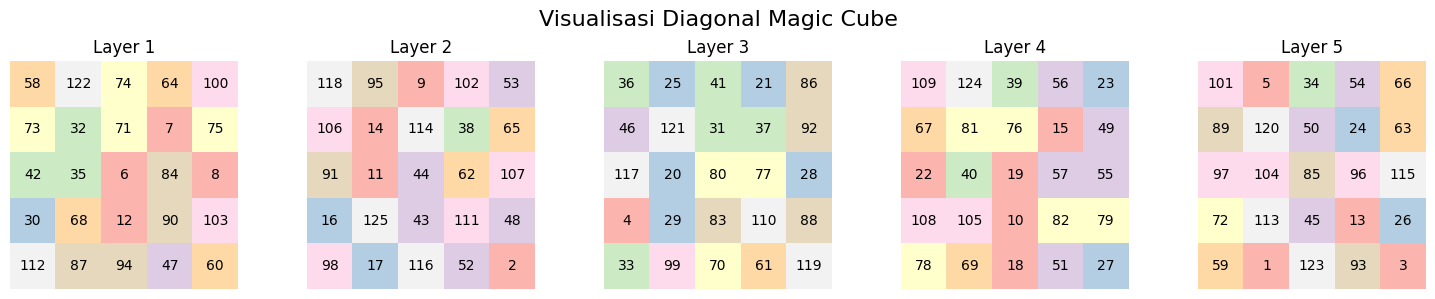

Final State:


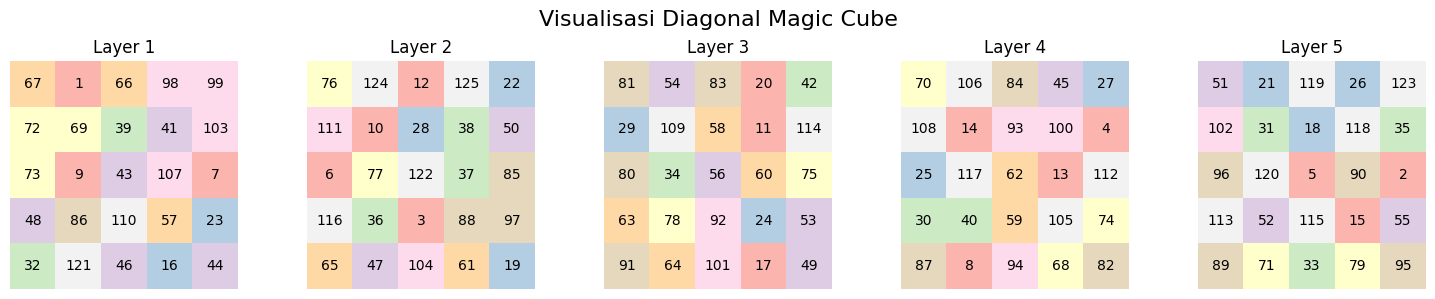

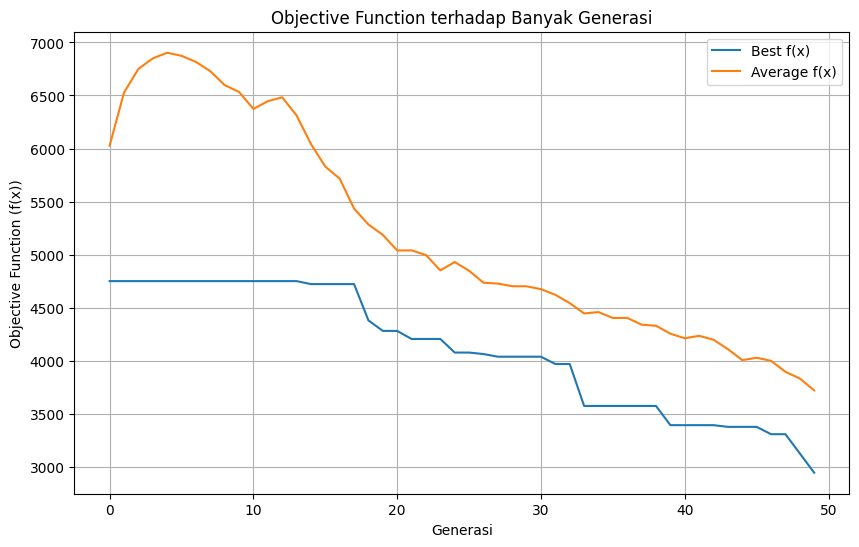

Generation 0: Best f(x) = 5039, Avg f(x) = 5905.56
Generation 1: Best f(x) = 4783, Avg f(x) = 6380.26
Generation 2: Best f(x) = 4783, Avg f(x) = 6709.76
Generation 3: Best f(x) = 4783, Avg f(x) = 6892.98
Generation 4: Best f(x) = 4783, Avg f(x) = 6945.8
Generation 5: Best f(x) = 4783, Avg f(x) = 6713.42
Generation 6: Best f(x) = 4516, Avg f(x) = 6623.5
Generation 7: Best f(x) = 4516, Avg f(x) = 6249.04
Generation 8: Best f(x) = 4516, Avg f(x) = 5810.34
Generation 9: Best f(x) = 4516, Avg f(x) = 5514.12
Generation 10: Best f(x) = 4516, Avg f(x) = 5361.12
Generation 11: Best f(x) = 4516, Avg f(x) = 5197.58
Generation 12: Best f(x) = 4234, Avg f(x) = 5265.3
Generation 13: Best f(x) = 4234, Avg f(x) = 5231.72
Generation 14: Best f(x) = 4234, Avg f(x) = 5172.82
Generation 15: Best f(x) = 4234, Avg f(x) = 5160.86
Generation 16: Best f(x) = 4234, Avg f(x) = 5139.8
Generation 17: Best f(x) = 4234, Avg f(x) = 5130.92
Generation 18: Best f(x) = 4234, Avg f(x) = 5091.48
Generation 19: Best f(x) =

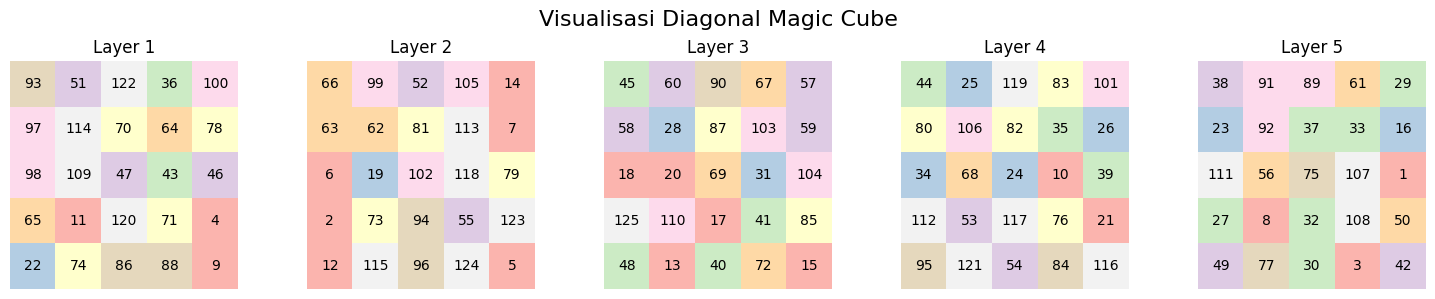

Final State:


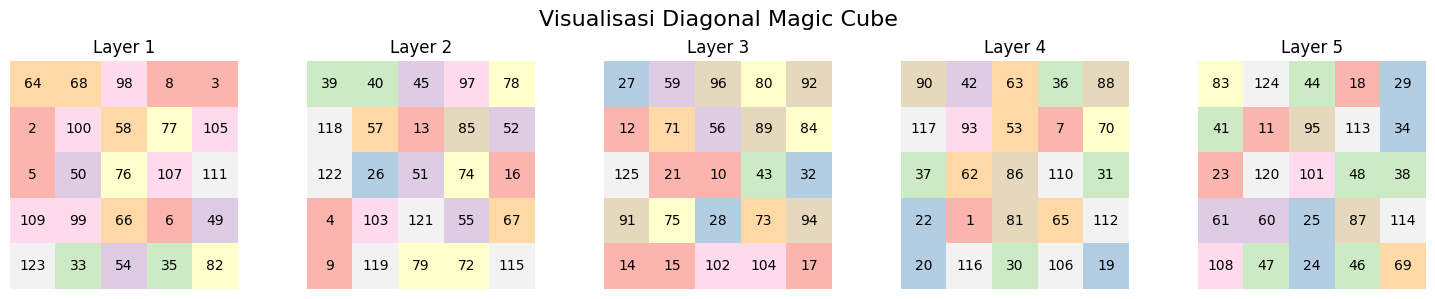

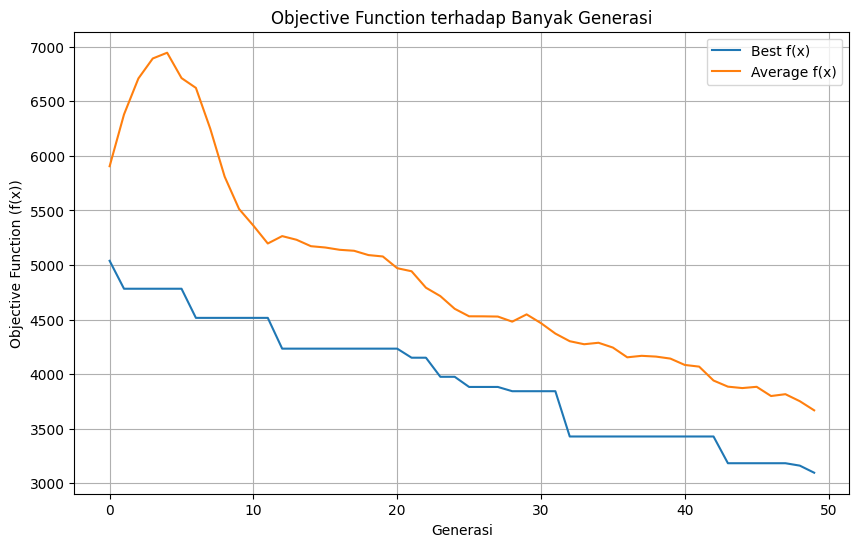

Generation 0: Best f(x) = 4882, Avg f(x) = 6000.94
Generation 1: Best f(x) = 4882, Avg f(x) = 6308.48
Generation 2: Best f(x) = 4882, Avg f(x) = 6543.28
Generation 3: Best f(x) = 4882, Avg f(x) = 6620.94
Generation 4: Best f(x) = 4882, Avg f(x) = 6687.38
Generation 5: Best f(x) = 4882, Avg f(x) = 6596.36
Generation 6: Best f(x) = 4882, Avg f(x) = 6390.72
Generation 7: Best f(x) = 4882, Avg f(x) = 6512.18
Generation 8: Best f(x) = 4882, Avg f(x) = 6385.68
Generation 9: Best f(x) = 4839, Avg f(x) = 6395.12
Generation 10: Best f(x) = 4839, Avg f(x) = 6568.7
Generation 11: Best f(x) = 4839, Avg f(x) = 6567.22
Generation 12: Best f(x) = 4839, Avg f(x) = 6418.08
Generation 13: Best f(x) = 4839, Avg f(x) = 6379.72
Generation 14: Best f(x) = 4839, Avg f(x) = 6296.5
Generation 15: Best f(x) = 4780, Avg f(x) = 6168.72
Generation 16: Best f(x) = 4780, Avg f(x) = 6164.28
Generation 17: Best f(x) = 4534, Avg f(x) = 5949.06
Generation 18: Best f(x) = 4534, Avg f(x) = 5904.08
Generation 19: Best f(x)

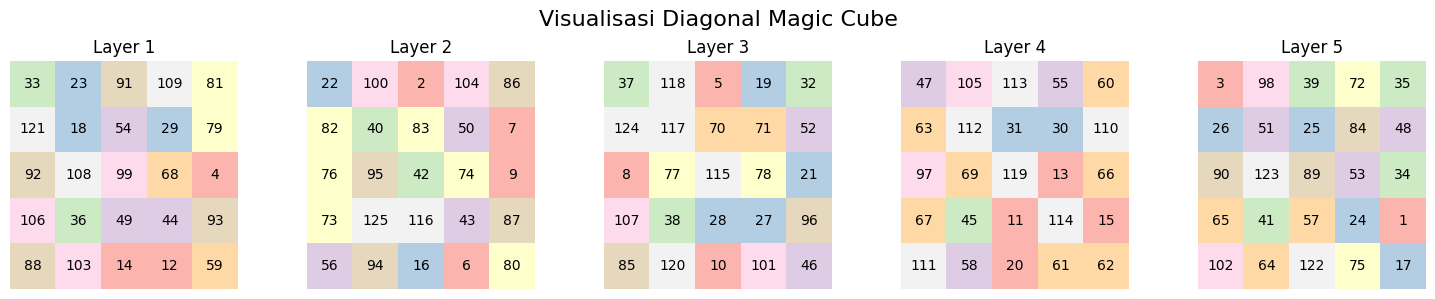

Final State:


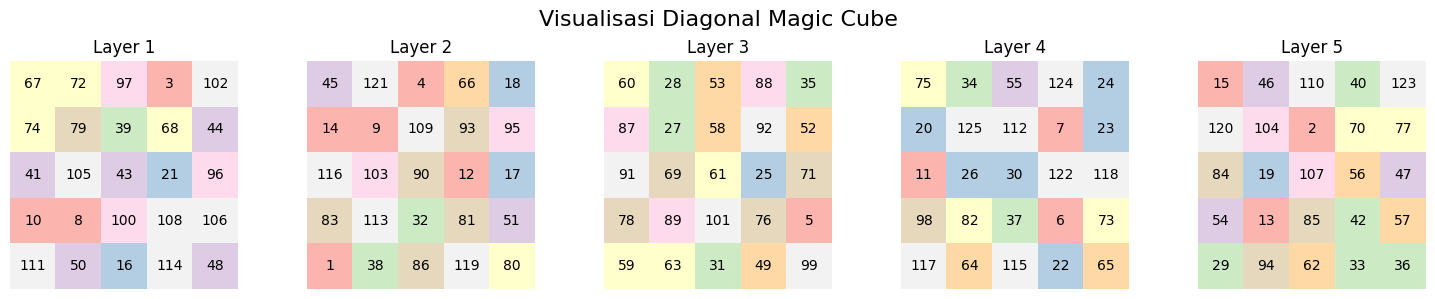

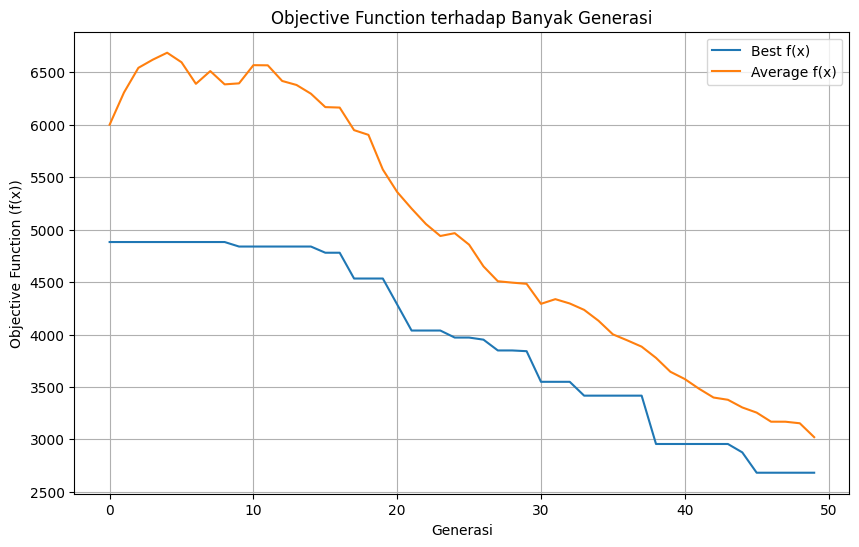

In [ ]:
if __name__ == "__main__":
    population_sizes = [50]
    max_generations_list = [10, 30, 50]

    for pop_size in population_sizes:
        for max_gen in max_generations_list:
            print(f"\nEksperimen: Ukuran Populasi = {pop_size}, Maksimum Generasi = {max_gen}")
            
            for run in range(3):  # Jalankan 3 kali untuk setiap konfigurasi
                initial_cube = MagicCube(n=5)
                
                final_cube, best_history, avg_history, generations, duration = genetic_algorithm(initial_cube, pop_size, max_gen)

                print(f"Run {run + 1}:")
                print(f"Total Generasi: {generations}")
                print(f"Durasi: {duration:.2f} detik")
                print(f"Final Objective Function: {final_cube.objectiveFunction()}")
                
                visualize_experiment(initial_cube, final_cube, best_history, avg_history)